In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [40]:
#standar code for plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [20]:
#dealing with ssl errors
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
def reset_graph(seed=92):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

Static_RNN

In static RNN we need to specify the number of times steps we want to input. For every time step we need to create a placeholder.

Weights are shared between cells for different time steps. We also need to specify the number of neurons in every cell

In [5]:
n_neurons=5
n_inputs=3   # dimension of input

reset_graph()

X0=tf.placeholder(tf.float32,[None,n_inputs])   #input at time = 0
X1=tf.placeholder(tf.float32,[None,n_inputs])   #input at time = 1

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1], dtype=tf.float32)

Y0,Y1 = outputs

init=tf.global_variables_initializer()

In [7]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val = sess.run(Y0,feed_dict={X0:X0_batch})

In [8]:
Y0_val

array([[-0.9282808 , -0.6494287 ,  0.44919947,  0.740712  ,  0.91083854],
       [-0.999041  , -0.88881266,  0.9726149 ,  0.99849916,  0.99819607],
       [-0.9999878 , -0.9679154 ,  0.99898636,  0.9999925 ,  0.9999651 ],
       [ 0.99640584,  0.99891376,  0.5332107 ,  0.9523876 , -0.90068614]],
      dtype=float32)

In [10]:
with tf.Session() as sess:
    init.run()
    Y0_val,Y1_val = sess.run([Y0,Y1], feed_dict={X0:X0_batch,X1:X1_batch})

In [11]:
Y0_val

array([[-0.9282808 , -0.6494287 ,  0.44919947,  0.740712  ,  0.91083854],
       [-0.999041  , -0.88881266,  0.9726149 ,  0.99849916,  0.99819607],
       [-0.9999878 , -0.9679154 ,  0.99898636,  0.9999925 ,  0.9999651 ],
       [ 0.99640584,  0.99891376,  0.5332107 ,  0.9523876 , -0.90068614]],
      dtype=float32)

In [12]:
Y1_val

array([[-0.9999773 , -0.8714017 ,  0.99994576,  0.9999941 ,  0.9997386 ],
       [-0.85674554, -0.16818923,  0.75746506, -0.76618785,  0.20119658],
       [-0.9993862 , -0.60517573,  0.9990403 ,  0.9975072 ,  0.9899046 ],
       [-0.73452485,  0.6392206 ,  0.88534486,  0.60503167, -0.13886805]],
      dtype=float32)

IN static_rnn we have to specify placeholders for every timestep. It'll  be combersome when time steps are large. There are ways to avoid that, still using static_rnn cells. But using dynmic rnn is better option.

# Dynamic Rnns

additionaly we just have to specify number of steps while defining placeholder.  

In [13]:
n_neurons = 5
n_inputs = 3   # dimension of input
n_steps = 2    # number of time steps

reset_graph()

X=tf.placeholder(tf.float32,[None,n_steps,n_inputs])

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

init=tf.global_variables_initializer()

In [14]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [18]:
outputs_val

array([[[-0.78376645, -0.5627818 ,  0.747252  ,  0.25222418,
          0.35902056],
        [-0.11089691, -0.99999785,  0.99999976,  0.99994224,
          0.9846872 ]],

       [[-0.87631726, -0.997182  ,  0.9994634 ,  0.967969  ,
          0.88318014],
        [-0.34235865,  0.8761979 , -0.43589815,  0.48222777,
         -0.3746321 ]],

       [[-0.9307921 , -0.9999859 ,  0.99999905,  0.9991132 ,
          0.9838143 ],
        [ 0.08313006, -0.99698126,  0.99987805,  0.99919605,
          0.8476281 ]],

       [[ 0.99201244, -0.9999889 ,  0.9999955 ,  0.9998333 ,
          0.98464084],
        [ 0.3280835 ,  0.2955202 ,  0.99269134,  0.9944291 ,
         -0.68697464]]], dtype=float32)

In [23]:
from tf_graph_in_jupyter import show_graph

In [ ]:
show_graph(tf.get_default_graph())

We can also add sequence length(as a placeholder). If our input in longer than sequnec length, model will output '0' for additional inputs

In [5]:
n_neurons = 5
n_inputs = 3   # dimension of input
n_steps = 2    # number of time steps

reset_graph()

X=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
seq_len=tf.placeholder(tf.int32,[None])

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_len)

init=tf.global_variables_initializer()

In [6]:
init = tf.global_variables_initializer()

In [9]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

seq_batch=np.array([2,1,2,2])

with tf.Session() as sess:
    init.run()
    outputs_val,states_val = sess.run([outputs,states],feed_dict={X: X_batch,seq_len:seq_batch})

In [10]:
outputs_val

array([[[-0.10526873, -0.9448716 , -0.29064518, -0.6119286 ,
         -0.33075336],
        [ 0.53786665, -1.        , -0.91434336, -0.99891925,
          0.9999986 ]],

       [[ 0.18431151, -0.99999917, -0.83524495, -0.96922135,
          0.9463261 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.44507715, -1.        , -0.97109705, -0.9979726 ,
          0.9992354 ],
        [-0.27028528, -1.        , -0.65366703, -0.9936612 ,
          0.9998479 ]],

       [[ 0.9946581 , -0.9999943 , -0.9191345 , -0.73840314,
          0.9998987 ],
        [-0.5173563 , -0.9984279 , -0.07008535, -0.7954988 ,
          0.9932782 ]]], dtype=float32)

In [12]:
states_val

array([[ 0.53786665, -1.        , -0.91434336, -0.99891925,  0.9999986 ],
       [ 0.18431151, -0.99999917, -0.83524495, -0.96922135,  0.9463261 ],
       [-0.27028528, -1.        , -0.65366703, -0.9936612 ,  0.9998479 ],
       [-0.5173563 , -0.9984279 , -0.07008535, -0.7954988 ,  0.9932782 ]],
      dtype=float32)

In [13]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

seq_batch=np.array([2,1,2,1])

with tf.Session() as sess:
    init.run()
    outputs_val,states_val = sess.run([outputs,states],feed_dict={X: X_batch,seq_len:seq_batch})

In [15]:
outputs_val

array([[[-0.10526873, -0.9448716 , -0.29064518, -0.6119286 ,
         -0.33075336],
        [ 0.53786665, -1.        , -0.91434336, -0.99891925,
          0.9999986 ]],

       [[ 0.18431151, -0.99999917, -0.83524495, -0.96922135,
          0.9463261 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.44507715, -1.        , -0.97109705, -0.9979726 ,
          0.9992354 ],
        [-0.27028528, -1.        , -0.65366703, -0.9936612 ,
          0.9998479 ]],

       [[ 0.9946581 , -0.9999943 , -0.9191345 , -0.73840314,
          0.9998987 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]]], dtype=float32)

sequence length is more important than actual sequence. If we use sequnece length less than the actual input, the output is zero. See output above


Single layer RNN for MNIST classification

Since each image in MNIST is 28x28, we will feed the data in 28 steps, each with size 28

In [37]:
reset_graph()

n_step = 28
n_input = 28
n_neurons = 120
n_outputs=10

lr=0.0001

X=tf.placeholder(tf.float32,[None,n_step,n_input])
y=tf.placeholder(tf.int32,[None])

# rnn_cell=tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

rnn_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(rnn_cell, X, dtype=tf.float32)

#states is the output of 28th time step and we are using dense layer above that.
#if we require an intermediate output, how can we do that
logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [38]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_step, n_input))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [39]:
n_epochs = 50
batch_size = 100

train_acc=[]
test_acc=[]
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch in range(len(mnist.train.images)//batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_step, n_input))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        #train and test accuracy for every epoch
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        train_acc.append(acc_train)
        test_acc.append(acc_test)
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.81 Test accuracy: 0.8153
1 Train accuracy: 0.88 Test accuracy: 0.8729
2 Train accuracy: 0.85 Test accuracy: 0.9052
3 Train accuracy: 0.92 Test accuracy: 0.9199
4 Train accuracy: 0.94 Test accuracy: 0.9277
5 Train accuracy: 0.95 Test accuracy: 0.9331
6 Train accuracy: 0.9 Test accuracy: 0.94
7 Train accuracy: 0.95 Test accuracy: 0.9397
8 Train accuracy: 0.95 Test accuracy: 0.9467
9 Train accuracy: 0.9 Test accuracy: 0.9476
10 Train accuracy: 0.96 Test accuracy: 0.953
11 Train accuracy: 0.96 Test accuracy: 0.954
12 Train accuracy: 0.98 Test accuracy: 0.9566
13 Train accuracy: 0.96 Test accuracy: 0.9549
14 Train accuracy: 0.99 Test accuracy: 0.9587
15 Train accuracy: 0.95 Test accuracy: 0.9568
16 Train accuracy: 0.99 Test accuracy: 0.955
17 Train accuracy: 0.97 Test accuracy: 0.9582
18 Train accuracy: 0.96 Test accuracy: 0.9624
19 Train accuracy: 0.96 Test accuracy: 0.9597
20 Train accuracy: 0.97 Test accuracy: 0.9645
21 Train accuracy: 0.94 Test accuracy: 0.9602
22 Tr

tf.nn.rnn_cell.BasicRNNCell was giving fluctuating accuracies(tried 3 times); tf.contrib.rnn.BasicRNNCell seem to work better for this case

Text(0,0.5,'accuracy')

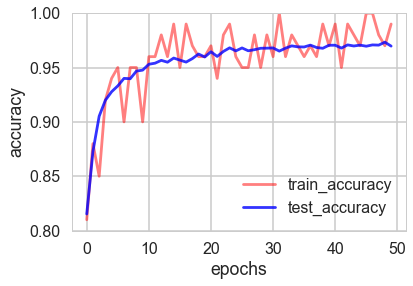

In [63]:
plt.plot(train_acc,color='r',label='train_accuracy',alpha=0.5)
plt.plot(test_acc,color='b',label='test_accuracy',alpha=0.8)
plt.ylim(0.8,1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')

# Multilayer RNNs